# AlexNet

## 1. Environment Setup

### 1.0. Check GPU

In [1]:
!nvidia-smi

Thu Jul 16 06:27:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 430.40       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:05:00.0  On |                  N/A |
| 23%   33C    P8    11W / 250W |     91MiB / 11175MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  TITAN Xp            Off  | 00000000:06:00.0 Off |                  N/A |
| 23%   35C    P8    10W / 250W |      2MiB / 12196MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

### 1.1. Install Pytorch and torchvision

In [2]:
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


### 1.2. Install matplotlib

In [3]:
!pip install matplotlib

### 1.3. Import

In [4]:
import train

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

## 2. Data Preprocessing

In [5]:
batch_size = 128

In [6]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(64),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

test_transform = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

trainset = torchvision.datasets.CIFAR10('./data/', train=True, download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True)

testset = torchvision.datasets.CIFAR10('./data/', train=False, download=True, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, pin_memory=True)

Files already downloaded and verified
Files already downloaded and verified


## 3. Train Model

In [7]:
num_classes = 10

gpu_id = 0
epoch_print = 20

epochs = 360

lr = 0.05
momentum = 0.9
weight_decay = 0.0005
milestones = [140, 260]

In [8]:
alex = train.AlexNet(num_classes=num_classes, gpu_id=gpu_id, epoch_print=epoch_print)

=> Create AlexNet


In [9]:
alex.train(trainloader, testloader, 
           epochs=epochs, lr=lr, momentum=momentum, weight_decay=weight_decay, milestones=milestones)

Epoch 1 Started...
Iteration : 10 - Train Loss : 2.28, Test Loss : 2.30, Train Acc : 12.50, Test Acc : 10.00
Iteration : 20 - Train Loss : 2.32, Test Loss : 2.19, Train Acc : 9.38, Test Acc : 14.45
Iteration : 30 - Train Loss : 2.08, Test Loss : 2.12, Train Acc : 16.41, Test Acc : 17.74
Iteration : 40 - Train Loss : 2.20, Test Loss : 2.13, Train Acc : 16.41, Test Acc : 16.73
Iteration : 50 - Train Loss : 2.07, Test Loss : 2.14, Train Acc : 17.97, Test Acc : 21.75
Iteration : 60 - Train Loss : 2.22, Test Loss : 2.16, Train Acc : 13.28, Test Acc : 17.12
Iteration : 70 - Train Loss : 2.29, Test Loss : 2.05, Train Acc : 14.84, Test Acc : 18.56
Iteration : 80 - Train Loss : 2.05, Test Loss : 2.02, Train Acc : 23.44, Test Acc : 19.83
Iteration : 90 - Train Loss : 2.12, Test Loss : 2.00, Train Acc : 15.62, Test Acc : 19.52
Iteration : 100 - Train Loss : 2.14, Test Loss : 2.09, Train Acc : 18.75, Test Acc : 17.77
Iteration : 110 - Train Loss : 1.99, Test Loss : 2.01, Train Acc : 17.19, Test Ac

Iteration : 130 - Train Loss : 1.37, Test Loss : 1.06, Train Acc : 57.03, Test Acc : 65.10
Iteration : 140 - Train Loss : 1.31, Test Loss : 1.03, Train Acc : 56.25, Test Acc : 65.71
Iteration : 150 - Train Loss : 1.45, Test Loss : 1.08, Train Acc : 44.53, Test Acc : 64.61
Iteration : 160 - Train Loss : 1.41, Test Loss : 1.14, Train Acc : 48.44, Test Acc : 61.67
Iteration : 170 - Train Loss : 1.34, Test Loss : 1.01, Train Acc : 56.25, Test Acc : 66.31
Iteration : 180 - Train Loss : 1.43, Test Loss : 1.04, Train Acc : 57.81, Test Acc : 65.87
Iteration : 190 - Train Loss : 1.35, Test Loss : 1.05, Train Acc : 53.91, Test Acc : 66.18
Iteration : 200 - Train Loss : 1.44, Test Loss : 1.01, Train Acc : 46.88, Test Acc : 67.28
Iteration : 210 - Train Loss : 1.39, Test Loss : 1.05, Train Acc : 49.22, Test Acc : 65.16
Iteration : 220 - Train Loss : 1.23, Test Loss : 1.06, Train Acc : 56.25, Test Acc : 64.93
Iteration : 230 - Train Loss : 1.36, Test Loss : 1.08, Train Acc : 57.81, Test Acc : 64.85

Iteration : 260 - Train Loss : 1.19, Test Loss : 0.97, Train Acc : 60.16, Test Acc : 68.21
Iteration : 270 - Train Loss : 1.45, Test Loss : 1.03, Train Acc : 53.12, Test Acc : 65.11
Iteration : 280 - Train Loss : 1.38, Test Loss : 1.05, Train Acc : 52.34, Test Acc : 65.20
Iteration : 290 - Train Loss : 1.35, Test Loss : 1.03, Train Acc : 57.81, Test Acc : 65.78
Iteration : 300 - Train Loss : 1.45, Test Loss : 0.98, Train Acc : 52.34, Test Acc : 68.18
Iteration : 310 - Train Loss : 1.27, Test Loss : 1.05, Train Acc : 56.25, Test Acc : 65.57
Iteration : 320 - Train Loss : 1.33, Test Loss : 1.15, Train Acc : 59.38, Test Acc : 62.74
Iteration : 330 - Train Loss : 1.28, Test Loss : 1.00, Train Acc : 54.69, Test Acc : 67.19
Iteration : 340 - Train Loss : 1.43, Test Loss : 1.10, Train Acc : 55.47, Test Acc : 64.99
Iteration : 350 - Train Loss : 1.18, Test Loss : 0.93, Train Acc : 60.94, Test Acc : 69.53
Iteration : 360 - Train Loss : 1.18, Test Loss : 0.96, Train Acc : 60.94, Test Acc : 69.20

Iteration : 380 - Train Loss : 1.25, Test Loss : 0.97, Train Acc : 55.47, Test Acc : 68.98
Iteration : 390 - Train Loss : 1.13, Test Loss : 0.94, Train Acc : 66.41, Test Acc : 70.26
Epoch 141 Started...
Iteration : 10 - Train Loss : 1.25, Test Loss : 0.93, Train Acc : 60.94, Test Acc : 70.10
Iteration : 20 - Train Loss : 1.02, Test Loss : 0.89, Train Acc : 66.41, Test Acc : 71.41
Iteration : 30 - Train Loss : 0.98, Test Loss : 0.85, Train Acc : 68.75, Test Acc : 72.30
Iteration : 40 - Train Loss : 0.86, Test Loss : 0.84, Train Acc : 73.44, Test Acc : 72.64
Iteration : 50 - Train Loss : 0.82, Test Loss : 0.84, Train Acc : 70.31, Test Acc : 73.00
Iteration : 60 - Train Loss : 1.02, Test Loss : 0.83, Train Acc : 67.97, Test Acc : 73.31
Iteration : 70 - Train Loss : 0.99, Test Loss : 0.81, Train Acc : 63.28, Test Acc : 74.07
Iteration : 80 - Train Loss : 1.13, Test Loss : 0.81, Train Acc : 63.28, Test Acc : 74.52
Iteration : 90 - Train Loss : 0.97, Test Loss : 0.79, Train Acc : 68.75, Test

Iteration : 110 - Train Loss : 0.82, Test Loss : 0.61, Train Acc : 75.00, Test Acc : 79.92
Iteration : 120 - Train Loss : 0.65, Test Loss : 0.59, Train Acc : 75.78, Test Acc : 80.17
Iteration : 130 - Train Loss : 0.55, Test Loss : 0.60, Train Acc : 82.81, Test Acc : 80.48
Iteration : 140 - Train Loss : 0.84, Test Loss : 0.60, Train Acc : 71.09, Test Acc : 80.62
Iteration : 150 - Train Loss : 0.72, Test Loss : 0.57, Train Acc : 73.44, Test Acc : 80.87
Iteration : 160 - Train Loss : 0.75, Test Loss : 0.57, Train Acc : 75.00, Test Acc : 81.16
Iteration : 170 - Train Loss : 0.62, Test Loss : 0.56, Train Acc : 76.56, Test Acc : 81.26
Iteration : 180 - Train Loss : 0.87, Test Loss : 0.58, Train Acc : 72.66, Test Acc : 80.83
Iteration : 190 - Train Loss : 0.90, Test Loss : 0.60, Train Acc : 67.97, Test Acc : 80.72
Iteration : 200 - Train Loss : 0.97, Test Loss : 0.58, Train Acc : 68.75, Test Acc : 80.33
Iteration : 210 - Train Loss : 0.61, Test Loss : 0.56, Train Acc : 74.22, Test Acc : 81.30

Iteration : 230 - Train Loss : 0.58, Test Loss : 0.59, Train Acc : 80.47, Test Acc : 81.72
Iteration : 240 - Train Loss : 0.90, Test Loss : 0.57, Train Acc : 71.09, Test Acc : 82.21
Iteration : 250 - Train Loss : 0.74, Test Loss : 0.60, Train Acc : 77.34, Test Acc : 81.14
Iteration : 260 - Train Loss : 0.61, Test Loss : 0.60, Train Acc : 80.47, Test Acc : 81.75
Iteration : 270 - Train Loss : 0.69, Test Loss : 0.58, Train Acc : 77.34, Test Acc : 81.57
Iteration : 280 - Train Loss : 0.78, Test Loss : 0.56, Train Acc : 74.22, Test Acc : 82.13
Iteration : 290 - Train Loss : 0.57, Test Loss : 0.57, Train Acc : 80.47, Test Acc : 82.18
Iteration : 300 - Train Loss : 0.46, Test Loss : 0.58, Train Acc : 86.72, Test Acc : 81.94
Iteration : 310 - Train Loss : 0.62, Test Loss : 0.62, Train Acc : 78.91, Test Acc : 81.12
Iteration : 320 - Train Loss : 0.61, Test Loss : 0.62, Train Acc : 80.47, Test Acc : 81.25
Iteration : 330 - Train Loss : 0.58, Test Loss : 0.60, Train Acc : 81.25, Test Acc : 80.97

Iteration : 350 - Train Loss : 0.50, Test Loss : 0.55, Train Acc : 82.81, Test Acc : 83.65
Iteration : 360 - Train Loss : 0.53, Test Loss : 0.55, Train Acc : 79.69, Test Acc : 83.82
Iteration : 370 - Train Loss : 0.42, Test Loss : 0.55, Train Acc : 83.59, Test Acc : 83.82
Iteration : 380 - Train Loss : 0.57, Test Loss : 0.55, Train Acc : 82.03, Test Acc : 83.81
Iteration : 390 - Train Loss : 0.38, Test Loss : 0.55, Train Acc : 85.94, Test Acc : 83.58
Epoch 281 Started...
Iteration : 10 - Train Loss : 0.52, Test Loss : 0.57, Train Acc : 84.38, Test Acc : 84.03
Iteration : 20 - Train Loss : 0.46, Test Loss : 0.58, Train Acc : 82.81, Test Acc : 84.09
Iteration : 30 - Train Loss : 0.37, Test Loss : 0.58, Train Acc : 87.50, Test Acc : 84.20
Iteration : 40 - Train Loss : 0.39, Test Loss : 0.58, Train Acc : 83.59, Test Acc : 84.09
Iteration : 50 - Train Loss : 0.45, Test Loss : 0.58, Train Acc : 86.72, Test Acc : 84.06
Iteration : 60 - Train Loss : 0.40, Test Loss : 0.58, Train Acc : 85.16, T

Iteration : 80 - Train Loss : 0.36, Test Loss : 0.62, Train Acc : 87.50, Test Acc : 84.21
Iteration : 90 - Train Loss : 0.43, Test Loss : 0.61, Train Acc : 85.94, Test Acc : 84.10
Iteration : 100 - Train Loss : 0.46, Test Loss : 0.61, Train Acc : 86.72, Test Acc : 84.20
Iteration : 110 - Train Loss : 0.37, Test Loss : 0.62, Train Acc : 88.28, Test Acc : 84.05
Iteration : 120 - Train Loss : 0.41, Test Loss : 0.61, Train Acc : 85.94, Test Acc : 84.15
Iteration : 130 - Train Loss : 0.43, Test Loss : 0.61, Train Acc : 86.72, Test Acc : 84.27
Iteration : 140 - Train Loss : 0.43, Test Loss : 0.62, Train Acc : 83.59, Test Acc : 84.17
Iteration : 150 - Train Loss : 0.48, Test Loss : 0.61, Train Acc : 81.25, Test Acc : 84.35
Iteration : 160 - Train Loss : 0.37, Test Loss : 0.61, Train Acc : 87.50, Test Acc : 84.25
Iteration : 170 - Train Loss : 0.38, Test Loss : 0.61, Train Acc : 86.72, Test Acc : 84.16
Iteration : 180 - Train Loss : 0.42, Test Loss : 0.61, Train Acc : 83.59, Test Acc : 84.10
I

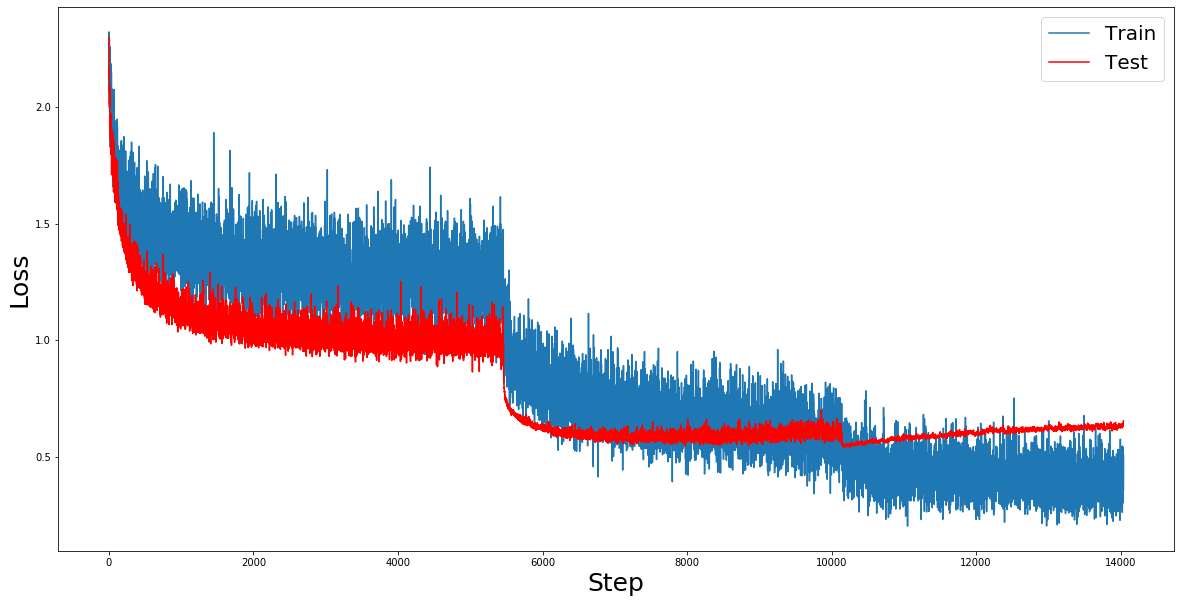

In [10]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(alex.train_losses, label='Train')
test_lossline, = plt.plot(alex.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

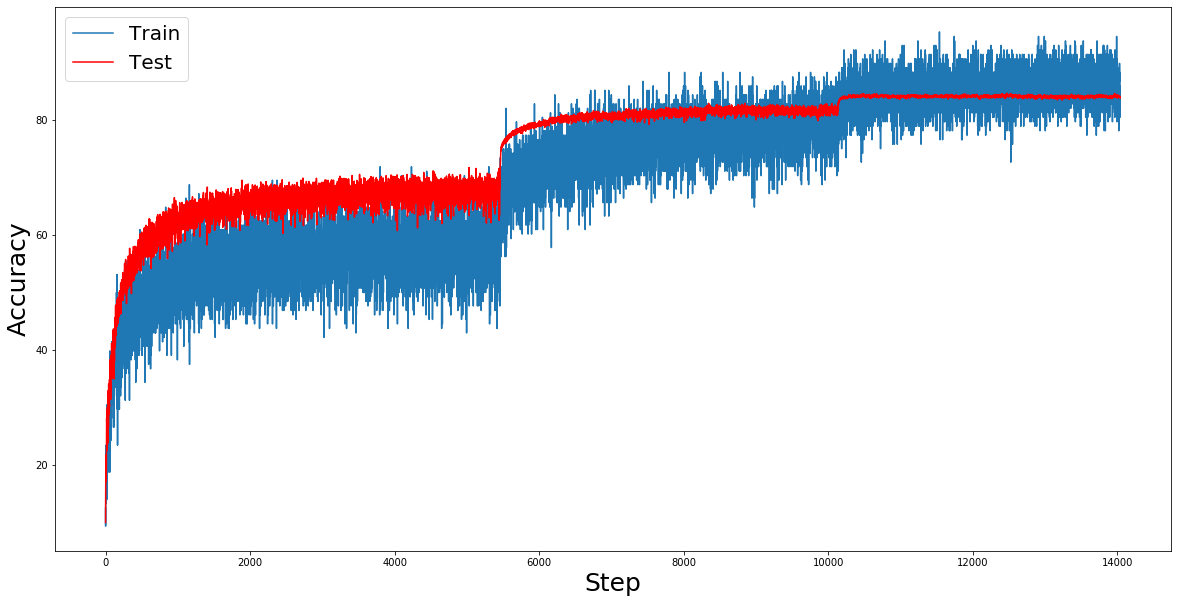

In [11]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(alex.train_acc, label='Train')
test_accline, = plt.plot(alex.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Accuracy', fontsize=label_fontsize)
plt.show()